In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 45.92
sigma = 16.0
beta = 4.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [0.62225717, -0.08232857, 30.60845379]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

c:\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


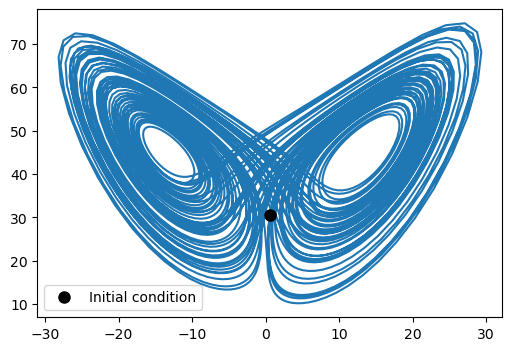

In [2]:
plt.figure(figsize=(6, 4))
plt.plot(x_train[:, 0], x_train[:, 2])
plt.plot(x_train[0, 0], x_train[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()

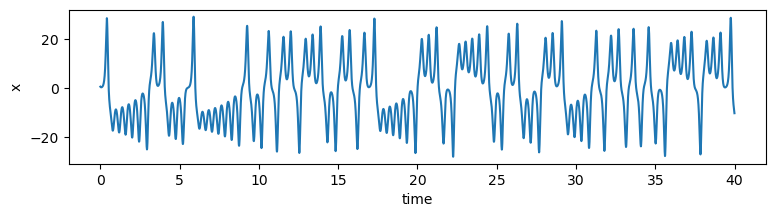

In [3]:
def plot_dimension(dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    plt.xlabel("time")
    plt.ylabel(name)

plot_dimension(0, 'x')

In [4]:
from scipy import sparse

radius = 0.6
sparsity = 0.01
input_dim = 3
reservoir_size = 1000
n_steps_prerun = 10
regularization = 1e-2
sequence = x_train

rho = 33.92
sigma = 16.0
beta = 8/3
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [0.0, 7.0, 1000.0]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states5 = np.squeeze(np.array(hidden_states))

In [5]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [2.5, 3.5, 1.6]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states4 = np.squeeze(np.array(hidden_states))

In [6]:
from scipy import sparse

rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [2.55, 3.5, 1.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states3 = np.squeeze(np.array(hidden_states))

In [7]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 1.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states1 = np.squeeze(np.array(hidden_states))

In [8]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states2 = np.squeeze(np.array(hidden_states))

In [9]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [2.5, 3.5, 1.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states0 = np.squeeze(np.array(hidden_states))

In [10]:
hidden_statesH = (hidden_states0+hidden_states1+hidden_states2+hidden_states3+hidden_states4)/6
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets


In [11]:
W = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [12]:
def predict0(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = W @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden

In [13]:
import math
def rmse(x_train, x_sim, dim=0):
    res = 0
    for i in range(len(x_sim[:, dim])):
        res = res + (x_sim[:, dim][i] - x_train[:, dim][i])**2
    res = math.sqrt(res/len(x_sim[:, dim]))
    print('RMSE = ', res)
    return res

RMSE =  14.898366040963458


C:\Users\nicks\AppData\Local\Temp\ipykernel_17600\2380549112.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


14.898366040963458

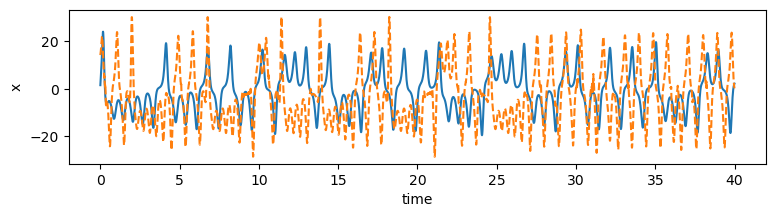

In [14]:
def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 9.5, 2.55]

x_train2 = odeint(f, state2, time_steps)
sequence = x_train2

x_sim20, H20 = predict0(sequence, 4000)

plot_dimension(x_train2, x_sim20, 0, 'x')

rmse(x_train2, x_sim20)

RMSE =  8.269037886211416


C:\Users\nicks\AppData\Local\Temp\ipykernel_17600\1893428355.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


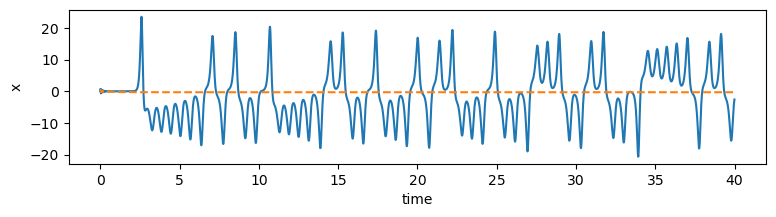

In [15]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [2.5, 3.5, 1.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

from scipy import sparse

radius = 0.6
sparsity = 0.01
input_dim = 3
reservoir_size = 1000
n_steps_prerun = 10
regularization = 1e-2
sequence = x_train

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))


def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states = np.squeeze(np.array(hidden_states))

weights_output = (np.linalg.inv(hidden_states.T@hidden_states + regularization * np.eye(reservoir_size)) @ hidden_states.T@targets).T

def predict(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = weights_output @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden

x_sim, H = predict(sequence, 4000)

def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

plot_dimension(x_train, x_sim, 0, 'x')

def rmse(x_train, x_sim, dim=0):
    res = 0
    for i in range(len(x_sim[:, dim])):
        res = res + (x_sim[:, dim][i] - x_train[:, dim][i])**2
    res = math.sqrt(res/len(x_sim[:, dim]))
    return res

bestrmse = rmse(x_train, x_sim)
print('RMSE = ', bestrmse)

In [16]:
WW = weights_output

In [17]:
def predict44(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = WW @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden


8.518493798793576


C:\Users\nicks\AppData\Local\Temp\ipykernel_17600\1893428355.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


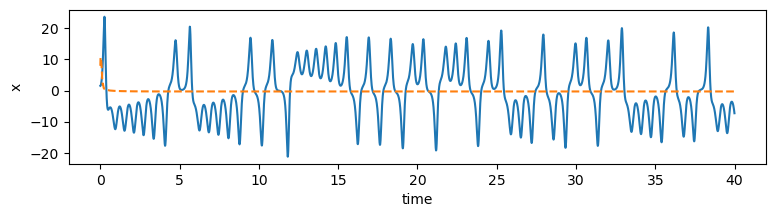

In [18]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train2 = odeint(f, state2, time_steps)
sequence = x_train2

x_sim20, H20 = predict44(sequence, 4000)

print(rmse(x_train2, x_sim20))

plot_dimension(x_train2, x_sim20, 0, 'x')

In [19]:
WW.shape

(3, 1000)

In [20]:
def Norma (W):
    sigm = 0
    for i in range(3):
        for j in range(1000):
            sigm = sigm + (W[i][j])**2
    return math.sqrt(sigm)

In [21]:
Norma (W)

224.12440135495285

In [22]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets
W5 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [23]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets
W4 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [24]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets
W3 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [25]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1
m2 = hidden_states0.T@targets+hidden_states1.T@targets
W2 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [26]:
m1 = hidden_states0.T@hidden_states0
m2 = hidden_states0.T@targets
W1 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [27]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4+hidden_states5.T@hidden_states5
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets+hidden_states5.T@targets
W6 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [44]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4+hidden_states5.T@hidden_states5+hidden_states6.T@hidden_states6
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets+hidden_states5.T@targets+hidden_states6.T@targets
W7 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [45]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4+hidden_states5.T@hidden_states5+hidden_states6.T@hidden_states6+hidden_states7.T@hidden_states7
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets+hidden_states5.T@targets+hidden_states6.T@targets+hidden_states7.T@targets
W8 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [46]:
m1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4+hidden_states5.T@hidden_states5+hidden_states6.T@hidden_states6+hidden_states7.T@hidden_states7+hidden_states8.T@hidden_states8
m2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets+hidden_states5.T@targets+hidden_states6.T@targets+hidden_states7.T@targets+hidden_states8.T@targets
W9 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [47]:
mm1 = hidden_states0.T@hidden_states0+hidden_states1.T@hidden_states1+hidden_states2.T@hidden_states2+hidden_states3.T@hidden_states3+hidden_states4.T@hidden_states4+hidden_states5.T@hidden_states5+hidden_states6.T@hidden_states6+hidden_states7.T@hidden_states7+hidden_states8.T@hidden_states8
mm2 = hidden_states0.T@targets+hidden_states1.T@targets+hidden_states2.T@targets+hidden_states3.T@targets+hidden_states4.T@targets+hidden_states5.T@targets+hidden_states6.T@targets+hidden_states7.T@targets+hidden_states8.T@targets
W9 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [48]:
m1 = mm1+hidden_states9.T@hidden_states9
m2 = mm2+hidden_states9.T@targets
W10 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [49]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets
W11 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [50]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets
W12 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [51]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets
W13 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [52]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12+hidden_states13.T@hidden_states13
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets+hidden_states13.T@targets
W14 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [53]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12+hidden_states13.T@hidden_states13+hidden_states14.T@hidden_states14
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets+hidden_states13.T@targets+hidden_states14.T@targets
W15 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [54]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12+hidden_states13.T@hidden_states13+hidden_states14.T@hidden_states14+hidden_states15.T@hidden_states15
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets+hidden_states13.T@targets+hidden_states14.T@targets+hidden_states15.T@targets
W16 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [55]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12+hidden_states13.T@hidden_states13+hidden_states14.T@hidden_states14+hidden_states15.T@hidden_states15+hidden_states16.T@hidden_states16
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets+hidden_states13.T@targets+hidden_states14.T@targets+hidden_states15.T@targets+hidden_states16.T@targets
W17 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [56]:
m1 = mm1+hidden_states9.T@hidden_states9+hidden_states10.T@hidden_states10+hidden_states11.T@hidden_states11+hidden_states12.T@hidden_states12+hidden_states13.T@hidden_states13+hidden_states14.T@hidden_states14+hidden_states15.T@hidden_states15+hidden_states16.T@hidden_states16+hidden_states17.T@hidden_states17
m2 = mm2+hidden_states9.T@targets+hidden_states10.T@targets+hidden_states11.T@targets+hidden_states12.T@targets+hidden_states13.T@targets+hidden_states14.T@targets+hidden_states15.T@targets+hidden_states16.T@targets+hidden_states17.T@targets
W18 = (np.linalg.inv(m1 + regularization * np.eye(reservoir_size)) @ m2).T

In [57]:
W1.shape

(3, 1000)

In [58]:
(W1 - W2).shape

(3, 1000)

In [59]:
W700 = W17 - W18

In [60]:
Norma (W700)

426.9744528272622

In [61]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 5.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states5 = np.squeeze(np.array(hidden_states))

In [62]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 10.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states6 = np.squeeze(np.array(hidden_states))

In [63]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 100.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states7 = np.squeeze(np.array(hidden_states))

In [64]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states8 = np.squeeze(np.array(hidden_states))

In [65]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [100.5, 1.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states9 = np.squeeze(np.array(hidden_states))

In [66]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, -1.5, -2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states10 = np.squeeze(np.array(hidden_states))

In [67]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, -200.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states11 = np.squeeze(np.array(hidden_states))

In [68]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, -1.5, -2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states12 = np.squeeze(np.array(hidden_states))

In [69]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.54, 1.55, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states13 = np.squeeze(np.array(hidden_states))

In [70]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 13.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states14 = np.squeeze(np.array(hidden_states))

In [71]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 0.0, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states15 = np.squeeze(np.array(hidden_states))

In [72]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 1.5, 8.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states16 = np.squeeze(np.array(hidden_states))

In [73]:
rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 55.5, 2.5]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

#вот вот
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states17 = np.squeeze(np.array(hidden_states))

In [74]:
def predict18(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = W18 @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden

C:\Users\nicks\AppData\Local\Temp\ipykernel_17600\1893428355.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


227.7887703717208

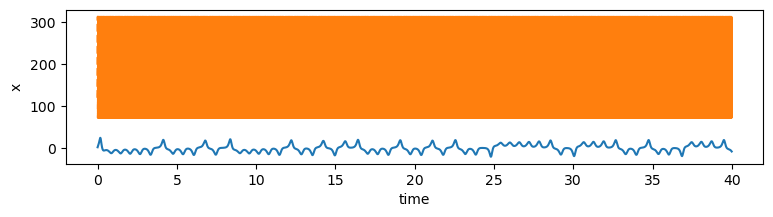

In [78]:
def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

rho = 33.0
sigma = 15.0
beta = 2.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [1.5, 9.5, 2.555]

x_train2 = odeint(f, state2, time_steps)
sequence = x_train2

x_sim20, H20 = predict18(sequence, 4000)

plot_dimension(x_train2, x_sim20, 0, 'x')

rmse(x_train2, x_sim20)